In [1]:
import os, random

import numpy as np
import tensorflow as tf

from sys import path
from PIL import Image
from scipy.ndimage import imread
from scipy.misc import imresize
from scipy.stats import pearsonr
from sklearn.metrics import roc_curve, auc

code_dir = os.path.join(os.path.abspath("."), "Functions")
path.append(code_dir)
data_dir = './PreProcessed/'

import InterfacePreprocessing as IntPre
import importFunctions as iF

/home/ubuntu/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [24]:
global raw_only, image_size, num_layer
raw_only = False
raw_image_size = 150
image_size= 88

if raw_only:
    num_layer = 1
else:
    num_layer = 6

p_matching = 0.5
num_filter_1 = 20
num_filter_2 = 40
num_filter_3 = 60

In [11]:
def weight_variable(shape, name_str):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial, name = name_str)

def bias_variable(shape, name_str):
    initial = tf.constant(0.3, shape=shape)
    return tf.Variable(initial, name = name_str)

def conv2d(x, W, stride=[1, 1, 1, 1]):
    return tf.nn.conv2d(x, W, strides=stride, padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [12]:
# Smaller Dataset for testing/validation
images_match_small, images_mismatch_small = iF.load_pairs_from_preprocessed("../Fingerprint_Data/PreProcessed/Match/", 
                                                                "../Fingerprint_Data/PreProcessed/MisMatch/", 
                                                                image_size, 1, True)

# Full Dataset
images_match_full, images_mismatch_full = iF.load_pairs_from_preprocessed("../Fingerprint_Data/Processed_Full_CASIA/Match/", 
                                                                "../Fingerprint_Data/Processed_Full_CASIA/MisMatch/", 
                                                                image_size, num_layer, False)
# images_match = dict()
# for key in images_match_full.keys():
#     images_match[key] = np.zeros((images_match_full[key].shape[0], images_match_full[key].shape[1], 1))
#     images_match[key][:,:,0] = images_match_full[key][:,:,5]
# images_mismatch = dict()
# for key in images_mismatch_full.keys():
#     images_mismatch[key] = np.zeros((images_mismatch_full[key].shape[0], images_mismatch_full[key].shape[1], 1))
#     images_mismatch[key] = images_mismatch_full[key][:,:,5]    
    
    
# images_match, images_mismatch = iF.load_pairs_from_preprocessed("../Fingerprint_Data/PreProcessed/Match/", 
#                                                                 "../Fingerprint_Data/PreProcessed/MisMatch/", 
#                                                                 image_size, num_layer, True)

In [13]:
images_match = dict()
for key in images_match_full.keys():
    images_match[key] = np.zeros((images_match_full[key].shape[0], images_match_full[key].shape[1], 1))
    images_match[key][:,:,0] = images_match_full[key][:,:,5]
images_mismatch = dict()
for key in images_mismatch_full.keys():
    images_mismatch[key] = np.zeros((images_mismatch_full[key].shape[0], images_mismatch_full[key].shape[1], 1))
    images_mismatch[key] = images_mismatch_full[key][:,:,5]    

In [18]:
images_match[key].shape

(88, 88, 1)

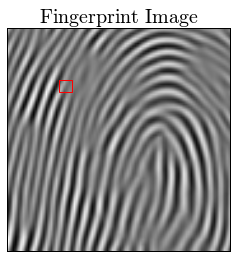

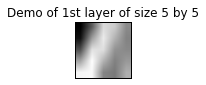

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
% matplotlib inline
gabor_only = True


if gabor_only:
    key = images_match.keys()[16]
    filter1_size = 5
    
    fig,ax = plt.subplots(1)
    ax.imshow(imresize(images_match[key][:,:,0],[image_size, image_size]),cmap = 'gray')
    ax.set_title(r'$\mathrm{Fingerprint \ Image}$', fontsize = 20)
    ax.set_xticks([]), ax.set_yticks([])
    rect = patches.Rectangle((20,20),filter1_size,filter1_size,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    

    plt.figure(figsize=(1,1))
    plt.title('Demo of 1st layer of size %d by %d' %(filter1_size, filter1_size))
    plt.imshow(images_match[key][20:20+filter1_size,20:20+filter1_size,0],cmap = 'gray')
    plt.xticks([]), plt.yticks([])
    
else:
    key = images_match.keys()[16]
    fig = plt.figure(figsize=(12, 7))

    plt.subplot(2,3,1)
    plt.imshow(images_match[key][:,:,0],cmap = 'gray')  
    plt.title(r'$\mathrm{Fingerprint \ Image}$', fontsize = 20)
    plt.xticks([]), plt.yticks([])

    plt.subplot(2,3,2)
    plt.imshow(images_match[key][:,:,2],cmap = 'jet')  
    plt.title(r'$\mathrm{Orientation \ Map}$', fontsize = 20)
    plt.xticks([]), plt.yticks([])

    plt.subplot(2,3,3)
    plt.imshow(images_match[key][:,:,3],cmap = 'jet')  
    plt.title(r'$\mathrm{Abs \ Orientation \ Map}$', fontsize = 20)
    plt.xticks([]), plt.yticks([])

    plt.subplot(2,3,4)
    plt.imshow(images_match[key][:,:,1],cmap = 'jet')  
    plt.title(r'$\mathrm{Frequency \ Map}$', fontsize = 20)
    plt.xticks([]), plt.yticks([])

    plt.subplot(2,3,5)
    plt.imshow(images_match[key][:,:,4],cmap = 'jet')  
    plt.title(r'$\mathrm{Variance \ Map}$', fontsize = 20)
    plt.xticks([]), plt.yticks([])

    plt.subplot(2,3,6)
    plt.imshow(images_match[key][:,:,5],cmap = 'gray')  
    plt.title(r'$\mathrm{Gabor \ Filter}$', fontsize = 20)
    plt.xticks([]), plt.yticks([]);

In [ ]:
global raw_only, image_size, num_layer
raw_only = True
raw_image_size = 150
image_size= 88

if raw_only:
    num_layer = 1
else:
    num_layer = 6

p_matching = 0.5
num_filter_1 = 20
num_filter_2 = 40
num_filter_3 = 60

In [26]:
# These two are input images
x = tf.placeholder(tf.float32, shape=[None, image_size*image_size*num_layer])
x_p = tf.placeholder(tf.float32, shape=[None, image_size*image_size*num_layer])

# y_ is just a value 0(match) or 1(no match) for the two input images
y_ = tf.placeholder(tf.float32, shape=[None, 1])

# Dropout coefficient
keep_prob = tf.placeholder(tf.float32)

W_conv1 = weight_variable([5, 5, num_layer, num_filter_1],'W_conv1')
b_conv1 = bias_variable([num_filter_1],'b_conv1')

W_conv2 = weight_variable([5, 5, num_filter_1, num_filter_2],'W_conv2')
b_conv2 = bias_variable([num_filter_2],'b_conv2')

W_conv1_p = weight_variable([5, 5, num_layer, num_filter_1],'W_conv1_p')
b_conv1_p = bias_variable([num_filter_1],'b_conv1_p')

W_conv2_p = weight_variable([5, 5, num_filter_1, num_filter_2],'W_conv2_p')
b_conv2_p = bias_variable([num_filter_2],'b_conv2_p')

W_fc1 = weight_variable([image_size/4*image_size/4*num_filter_2, 1024],'W_fc1')
b_fc1 = bias_variable([1024],'b_fc1')

W_fc2 = weight_variable([1024, 2],'W_fc2')
b_fc2 = bias_variable([2],'b_fc2')

In [27]:
# Input Image
x_image = tf.reshape(x, [-1,image_size,image_size,num_layer])

# First Conv Layer - after maxpool 44*44
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
h1_out = h_conv1*1
w1_out = W_conv1*1
z1 = tf.reshape(h_pool1, [-1,image_size/2*image_size/2*num_filter_1])
z1_norm = tf.pow(tf.reduce_sum(tf.pow(z1, 2), reduction_indices=1),0.5)

# Second Conv Layer - after maxpool 22*22
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
h2_out = h_conv2*1
w2_out = W_conv2*1
z2 = tf.reshape(h_pool2, [-1,image_size/4*image_size/4*num_filter_2])
z2_norm = tf.pow(tf.reduce_sum(tf.pow(z2, 2), reduction_indices=1),0.5)

# Final Data Processing Step
z = z2
z_norm = z2_norm

h_fc1 = tf.nn.relu(tf.matmul(z, W_fc1) + b_fc1)
h_fc1_norm = tf.sqrt(tf.reduce_sum(tf.square(h_fc1)))
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

# ############### #
#      Side 2     #
# ############### #

# Input Image
x_image_p = tf.reshape(x_p, [-1,image_size,image_size,num_layer])

# First Conv Layer - after maxpool 44*44
h_conv1_p = tf.nn.relu(conv2d(x_image_p, W_conv1_p) + b_conv1_p)
h_pool1_p = max_pool_2x2(h_conv1_p)
w1_p_out = W_conv1_p*1
z1_p = tf.reshape(h_pool1_p, [-1,image_size/2*image_size/2*num_filter_1])
z1_p_norm = tf.pow(tf.reduce_sum(tf.pow(z1_p, 2), reduction_indices=1),0.5)

# Second Conv Layer - after maxpool 22*22
h_conv2_p = tf.nn.relu(conv2d(h_pool1_p, W_conv2_p) + b_conv2_p)
h_pool2_p = max_pool_2x2(h_conv2_p)
w2_p_out = W_conv2_p*1
z2_p = tf.reshape(h_pool2_p, [-1,image_size/4*image_size/4*num_filter_2])
z2_p_norm = tf.pow(tf.reduce_sum(tf.pow(z2_p, 2), reduction_indices=1),0.5)

# Final Data Processing Step
z_p = z2_p
z_p_norm = z2_p_norm

h_fc1_p = tf.nn.relu(tf.matmul(z_p, W_fc1) + b_fc1)
h_fc1_p_norm = tf.sqrt(tf.reduce_sum(tf.square(h_fc1_p)))
h_fc1_p_drop = tf.nn.dropout(h_fc1, keep_prob)

y_conv_p=tf.nn.softmax(tf.matmul(h_fc1_p_drop, W_fc2) + b_fc2)

In [39]:
# Cosine Similarity for first 2 layers
distance2 = tf.mul(tf.div(tf.reduce_sum(z2 * z2_p, reduction_indices=1), z2_norm * z2_p_norm), tf.transpose(y_))
abs_dist2 = tf.div(tf.reduce_sum(z2 * z2_p, reduction_indices=1), z2_norm * z2_p_norm)
cross_entropy2 = -tf.reduce_sum(distance2, reduction_indices=1)

# Train first 2 convolutional layers
train_step2 = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy2)

auc_list = []
kernel2s = dict()

saver = tf.train.Saver({"W1": W_conv1, "W2": W_conv2,
                        "b1": b_conv1,"b2": b_conv2,
                        "W1_p": W_conv1_p, "W2_p": W_conv2_p,
                        "b1_p": b_conv1_p,"b2_p": b_conv2_p,
                        "W_fc1": W_fc1, "b_fc1": b_fc1,
                        "W_fc2": W_fc2, "b_fc2": b_fc2})

init_op = tf.initialize_all_variables()

# For testing only. 
temp_num_layer = 1

with tf.Session() as sess:
    sess.run(init_op)
    distance = tf.mul(tf.div(tf.reduce_sum(z*z_p, reduction_indices=1), z_norm*z_p_norm), tf.transpose(y_))
    cross_entropy = -tf.reduce_sum(distance, reduction_indices=1)
    sess.run(tf.initialize_all_variables())
    
    for i in range(300):
        batch = iF.generate_batch_pairs_from_preprocessed(images_match, images_mismatch, 25, image_size, num_layer)
#         ###
#         batch = np.zeros(batch_original.shape[0], batch_original.shape[1]/6)
#         for row in range(batch_original.shape[0]):
#             batch[row] = (batch_original[row,:].reshape((image_size,image_size,num_layer))[5]).reshape(batch_original.shape[1]/6)
#         ###    
        if i % 30 == 0:
            
            auc_batch = iF.generate_batch_pairs_from_preprocessed(images_match_small, images_mismatch_small, \
                                                                  50, image_size, num_layer)
            
            
#             ###
#             auc_batch = np.zeros(auc_batch_original.shape[0], auc_batch_original.shape[1]/6)
#             for row in range(auc_batch_original.shape[0]):
#                 auc_batch[row] = (auc_batch_original[row,:].reshape((image_size,image_size,num_layer))[5]).reshape(auc_batch_original.shape[1]/6)
#             ###
            
            str1 =  'Iteration '+ str(i) 
            
            d2 =  abs_dist2.eval(feed_dict={x:auc_batch[0], x_p:auc_batch[1], y_: auc_batch[2], keep_prob: 1.0})
            fpr, tpr, _ = roc_curve(auc_batch[2], d2.T)
            roc_auc = auc(fpr, tpr)
            auc_list.append(roc_auc)
            
            str5 = ' AUC2: %.2f'% roc_auc + \
                    ' Loss: ' + \
                    str(cross_entropy2.eval(feed_dict={x:auc_batch[0], 
                                                      x_p:auc_batch[1], 
                                                      y_: auc_batch[2], 
                                                      keep_prob: 1.0})[0])
            print str1+str5
            
            kernel2s[str(i)] = w2_out.eval(feed_dict={x:batch[0], x_p:batch[1], y_: batch[2], keep_prob: 1.0})
            h1 = h1_out.eval(feed_dict={x:batch[0], x_p:batch[1], y_: batch[2], keep_prob: 1.0})
            h2 = h2_out.eval(feed_dict={x:batch[0], x_p:batch[1], y_: batch[2], keep_prob: 1.0})
            
        train_step2.run(feed_dict={x:batch[0], x_p:batch[1], y_: batch[2], keep_prob: 1.0})
        
        

Iteration 0 AUC2: 0.67 Loss: -9.52219
Iteration 30 AUC2: 0.50 Loss: -18.8341
Iteration 60 AUC2: 0.76 Loss: -23.2015
Iteration 90 AUC2: 0.68 Loss: -23.5292
Iteration 120 AUC2: 0.61 Loss: -23.8778
Iteration 150 AUC2: 0.57 Loss: -23.8506
Iteration 180 AUC2: 0.75 Loss: -24.1494
Iteration 210 AUC2: 0.63 Loss: -24.2746
Iteration 240 AUC2: 0.59 Loss: -24.0129
Iteration 270 AUC2: 0.56 Loss: -24.0479


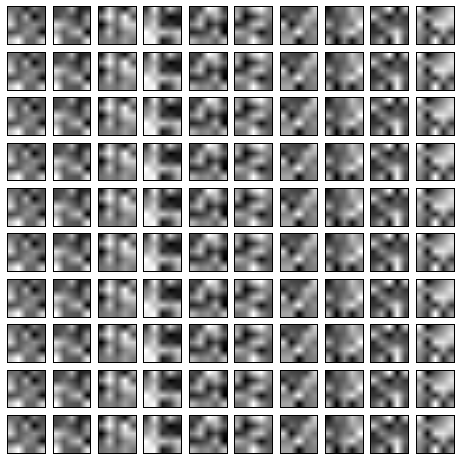

In [29]:
f, axarr = plt.subplots(10, 10, figsize = (8,8))
indices = np.linspace(0,45,10).astype(int)

i = 0
for ind in indices:
    kernel2 = kernel2s[str(ind)]
    for j in range(10):
        axarr[i, j].imshow(kernel2[:,:,0,j],cmap = 'gray')
        axarr[i, j].get_xaxis().set_visible(False)
        axarr[i, j].get_yaxis().set_visible(False)
    i += 1

In [26]:
print 'A randomly selected filter before training:'
kernel2s['0'][:,:,0,19]

A randomly selected filter before training:


array([[ 0.11008111,  0.15462661, -0.02245311, -0.03988669,  0.11710227],
       [ 0.09636885,  0.00160629,  0.1381263 ,  0.04409473,  0.00493328],
       [ 0.03292393,  0.1355195 ,  0.15530239,  0.02083028, -0.09326076],
       [-0.03734733, -0.11658031, -0.06339164,  0.00131981,  0.08829065],
       [-0.05263833,  0.10162445, -0.08985305, -0.02232367,  0.04134043]], dtype=float32)

In [25]:
print 'Same filter after 50 iterations:'
kernel2s['45'][:,:,0,19]

Same filter after 50 iterations:


array([[ 0.11270311,  0.15748134, -0.01972116, -0.03721827,  0.12003719],
       [ 0.0989254 ,  0.00445785,  0.14072177,  0.0467563 ,  0.00778523],
       [ 0.03546984,  0.13841307,  0.15775523,  0.02341398, -0.0903488 ],
       [-0.03469056, -0.11373849, -0.06084269,  0.00391475,  0.09110504],
       [-0.04971391,  0.10488317, -0.08688745, -0.01931868,  0.04459268]], dtype=float32)

In [24]:
print 'But images intensities are:'
images_match[images_match.keys()[0]][:7,:7,0]

But images intensities are:


array([[  42.,   21.,   61.,  180.,  227.,  207.,  134.],
       [  56.,  134.,  179.,  171.,  165.,   93.,   47.],
       [ 153.,  209.,  223.,  177.,  101.,   30.,   26.],
       [ 235.,  229.,  177.,   91.,   44.,   17.,   16.],
       [ 234.,  168.,   60.,   16.,   55.,   30.,   30.],
       [ 183.,   80.,   13.,    6.,   24.,   50.,  125.],
       [  58.,   39.,   24.,   21.,   71.,  141.,  176.]])

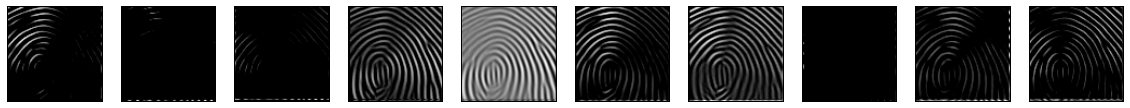

In [37]:
f, axarr = plt.subplots(1, 10, figsize = (20,3))
for i in range(10):
    axarr[i].imshow(h1[2,:,:,i],cmap='gray')
    axarr[i].get_xaxis().set_visible(False)
    axarr[i].get_yaxis().set_visible(False)

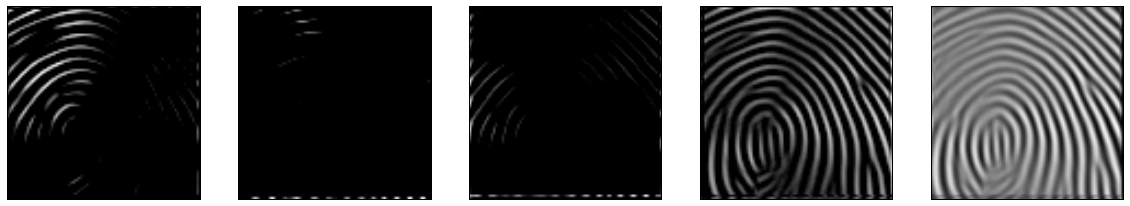

In [38]:
f, axarr = plt.subplots(1, 5, figsize = (20,10))
for i in range(5):
    axarr[i].imshow(h1[2,:,:,i],cmap='gray')
    axarr[i].get_xaxis().set_visible(False)
    axarr[i].get_yaxis().set_visible(False)

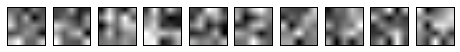

In [33]:
f, axarr = plt.subplots(1, 10, figsize = (8,8))

kernel2 = kernel2s[str(45)]
for j in range(10):
    axarr[j].imshow(kernel2[:,:,0,j],cmap = 'gray')
    axarr[j].get_xaxis().set_visible(False)
    axarr[j].get_yaxis().set_visible(False)

In [34]:
kernel2.shape

(5, 5, 20, 40)

In [57]:
images_match[images_match.keys()[0]].shape

(88, 88, 6)